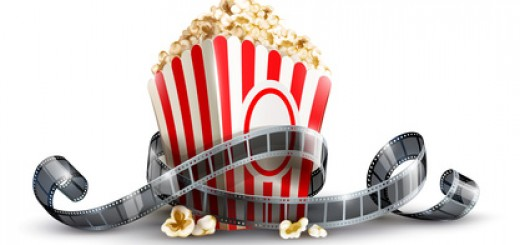

# FINAL PROJECT - Movie Genre Classification

Blanca Ubaque - 201725992

Carolina Trespalacios - 200313688

# 2. Solution using text and images with Transfer Learning and CNN

In [0]:
## Import libraries

In [174]:
 !pip install tqdm

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm
import skimage
from skimage import io
%matplotlib inline

In [176]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Read color images

In [0]:
file_id = '19g4Sphp6RdhvaM3fKXZYe7fxiRtH9Jmu'  
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [107]:
!unzip Images_resize.zip

Archive:  Images_resize.zip
   creating: Images_resize/
  inflating: Images_resize/0.jpeg    
   creating: __MACOSX/
   creating: __MACOSX/Images_resize/
  inflating: __MACOSX/Images_resize/._0.jpeg  
  inflating: Images_resize/1.jpeg    
  inflating: Images_resize/10.jpeg   
  inflating: Images_resize/100.jpeg  
  inflating: Images_resize/1000.jpeg  
  inflating: Images_resize/10000.jpeg  
  inflating: Images_resize/10001.jpeg  
  inflating: Images_resize/10002.jpeg  
  inflating: Images_resize/10003.jpeg  
  inflating: Images_resize/10004.jpeg  
  inflating: Images_resize/10005.jpeg  
  inflating: Images_resize/10006.jpeg  
  inflating: Images_resize/10007.jpeg  
  inflating: Images_resize/10008.jpeg  
  inflating: Images_resize/10009.jpeg  
  inflating: Images_resize/1001.jpeg  
  inflating: Images_resize/10010.jpeg  
  inflating: Images_resize/10011.jpeg  
  inflating: Images_resize/10012.jpeg  
  inflating: Images_resize/10013.jpeg  
  inflating: Images_resize/10014.jpeg  
  infla

  inflating: Images_resize/1070.jpeg  
  inflating: Images_resize/10700.jpeg  
  inflating: Images_resize/10701.jpeg  
  inflating: Images_resize/10702.jpeg  
  inflating: Images_resize/10703.jpeg  
  inflating: Images_resize/10704.jpeg  
  inflating: Images_resize/10705.jpeg  
  inflating: Images_resize/10706.jpeg  
  inflating: Images_resize/10707.jpeg  
  inflating: Images_resize/10708.jpeg  
  inflating: Images_resize/10709.jpeg  
  inflating: Images_resize/1071.jpeg  
  inflating: Images_resize/10710.jpeg  
  inflating: Images_resize/10711.jpeg  
  inflating: Images_resize/10712.jpeg  
  inflating: Images_resize/10713.jpeg  
  inflating: Images_resize/10714.jpeg  
  inflating: Images_resize/10715.jpeg  
  inflating: Images_resize/10716.jpeg  
  inflating: Images_resize/10717.jpeg  
  inflating: Images_resize/10718.jpeg  
  inflating: Images_resize/10719.jpeg  
  inflating: Images_resize/1072.jpeg  
  inflating: Images_resize/10720.jpeg  
  inflating: Images_resize/10721.jpeg  
  i

  inflating: Images_resize/1269.jpeg  
  inflating: Images_resize/127.jpeg  
  inflating: Images_resize/1270.jpeg  
  inflating: Images_resize/1271.jpeg  
  inflating: Images_resize/1272.jpeg  
  inflating: Images_resize/1273.jpeg  
  inflating: Images_resize/1274.jpeg  
  inflating: Images_resize/1275.jpeg  
  inflating: Images_resize/1276.jpeg  
  inflating: Images_resize/1277.jpeg  
  inflating: Images_resize/1278.jpeg  
  inflating: Images_resize/1279.jpeg  
  inflating: Images_resize/128.jpeg  
  inflating: Images_resize/1280.jpeg  
  inflating: Images_resize/1281.jpeg  
  inflating: Images_resize/1282.jpeg  
  inflating: Images_resize/1283.jpeg  
  inflating: Images_resize/1284.jpeg  
  inflating: Images_resize/1285.jpeg  
  inflating: Images_resize/1286.jpeg  
  inflating: Images_resize/1287.jpeg  
  inflating: Images_resize/1288.jpeg  
  inflating: Images_resize/1289.jpeg  
  inflating: Images_resize/129.jpeg  
  inflating: Images_resize/1290.jpeg  
  inflating: Images_resize/1

  inflating: Images_resize/2046.jpeg  
  inflating: Images_resize/2047.jpeg  
  inflating: Images_resize/2048.jpeg  
  inflating: Images_resize/2049.jpeg  
  inflating: Images_resize/205.jpeg  
  inflating: Images_resize/2050.jpeg  
  inflating: Images_resize/2051.jpeg  
  inflating: Images_resize/2052.jpeg  
  inflating: Images_resize/2053.jpeg  
  inflating: Images_resize/2054.jpeg  
  inflating: Images_resize/2055.jpeg  
  inflating: Images_resize/2056.jpeg  
  inflating: Images_resize/2057.jpeg  
  inflating: Images_resize/2058.jpeg  
  inflating: Images_resize/2059.jpeg  
  inflating: Images_resize/206.jpeg  
  inflating: Images_resize/2060.jpeg  
  inflating: Images_resize/2061.jpeg  
  inflating: Images_resize/2062.jpeg  
  inflating: Images_resize/2063.jpeg  
  inflating: Images_resize/2064.jpeg  
  inflating: Images_resize/2065.jpeg  
  inflating: Images_resize/2066.jpeg  
  inflating: Images_resize/2067.jpeg  
  inflating: Images_resize/2068.jpeg  
  inflating: Images_resize/

  inflating: Images_resize/2811.jpeg  
  inflating: Images_resize/2812.jpeg  
  inflating: Images_resize/2813.jpeg  
  inflating: Images_resize/2814.jpeg  
  inflating: Images_resize/2815.jpeg  
  inflating: Images_resize/2816.jpeg  
  inflating: Images_resize/2817.jpeg  
  inflating: Images_resize/2818.jpeg  
  inflating: Images_resize/2819.jpeg  
  inflating: Images_resize/282.jpeg  
  inflating: Images_resize/2820.jpeg  
  inflating: Images_resize/2821.jpeg  
  inflating: Images_resize/2822.jpeg  
  inflating: Images_resize/2823.jpeg  
  inflating: Images_resize/2824.jpeg  
  inflating: Images_resize/2825.jpeg  
  inflating: Images_resize/2826.jpeg  
  inflating: Images_resize/2827.jpeg  
  inflating: Images_resize/2828.jpeg  
  inflating: Images_resize/2829.jpeg  
  inflating: Images_resize/283.jpeg  
  inflating: Images_resize/2830.jpeg  
  inflating: Images_resize/2831.jpeg  
  inflating: Images_resize/2832.jpeg  
  inflating: Images_resize/2833.jpeg  
  inflating: Images_resize/

  inflating: Images_resize/3452.jpeg  
  inflating: Images_resize/3453.jpeg  
  inflating: Images_resize/3454.jpeg  
  inflating: Images_resize/3455.jpeg  
  inflating: Images_resize/3456.jpeg  
  inflating: Images_resize/3457.jpeg  
  inflating: Images_resize/3458.jpeg  
  inflating: Images_resize/3459.jpeg  
  inflating: Images_resize/346.jpeg  
  inflating: Images_resize/3460.jpeg  
  inflating: Images_resize/3461.jpeg  
  inflating: Images_resize/3462.jpeg  
  inflating: Images_resize/3463.jpeg  
  inflating: Images_resize/3464.jpeg  
  inflating: Images_resize/3465.jpeg  
  inflating: Images_resize/3466.jpeg  
  inflating: Images_resize/3467.jpeg  
  inflating: Images_resize/3468.jpeg  
  inflating: Images_resize/3469.jpeg  
  inflating: Images_resize/347.jpeg  
  inflating: Images_resize/3470.jpeg  
  inflating: Images_resize/3471.jpeg  
  inflating: Images_resize/3472.jpeg  
  inflating: Images_resize/3473.jpeg  
  inflating: Images_resize/3474.jpeg  
  inflating: Images_resize/

  inflating: Images_resize/4144.jpeg  
  inflating: Images_resize/4145.jpeg  
  inflating: Images_resize/4146.jpeg  
  inflating: Images_resize/4147.jpeg  
  inflating: Images_resize/4148.jpeg  
  inflating: Images_resize/4149.jpeg  
  inflating: Images_resize/415.jpeg  
  inflating: Images_resize/4150.jpeg  
  inflating: Images_resize/4151.jpeg  
  inflating: Images_resize/4152.jpeg  
  inflating: Images_resize/4153.jpeg  
  inflating: Images_resize/4154.jpeg  
  inflating: Images_resize/4155.jpeg  
  inflating: Images_resize/4156.jpeg  
  inflating: Images_resize/4157.jpeg  
  inflating: Images_resize/4158.jpeg  
  inflating: Images_resize/4159.jpeg  
  inflating: Images_resize/416.jpeg  
  inflating: Images_resize/4160.jpeg  
  inflating: Images_resize/4161.jpeg  
  inflating: Images_resize/4162.jpeg  
  inflating: Images_resize/4163.jpeg  
  inflating: Images_resize/4164.jpeg  
  inflating: Images_resize/4165.jpeg  
  inflating: Images_resize/4166.jpeg  
  inflating: Images_resize/

  inflating: Images_resize/4982.jpeg  
  inflating: Images_resize/4983.jpeg  
  inflating: Images_resize/4984.jpeg  
  inflating: Images_resize/4985.jpeg  
  inflating: Images_resize/4986.jpeg  
  inflating: Images_resize/4987.jpeg  
  inflating: Images_resize/4988.jpeg  
  inflating: Images_resize/4989.jpeg  
  inflating: Images_resize/499.jpeg  
  inflating: Images_resize/4990.jpeg  
  inflating: Images_resize/4991.jpeg  
  inflating: Images_resize/4992.jpeg  
  inflating: Images_resize/4993.jpeg  
  inflating: Images_resize/4994.jpeg  
  inflating: Images_resize/4995.jpeg  
  inflating: Images_resize/4996.jpeg  
  inflating: Images_resize/4997.jpeg  
  inflating: Images_resize/4998.jpeg  
  inflating: Images_resize/4999.jpeg  
  inflating: Images_resize/5.jpeg    
  inflating: Images_resize/50.jpeg   
  inflating: Images_resize/500.jpeg  
  inflating: Images_resize/5000.jpeg  
  inflating: Images_resize/5001.jpeg  
  inflating: Images_resize/5002.jpeg  
  inflating: Images_resize/50

  inflating: Images_resize/5736.jpeg  
  inflating: Images_resize/5737.jpeg  
  inflating: Images_resize/5738.jpeg  
  inflating: Images_resize/5739.jpeg  
  inflating: Images_resize/574.jpeg  
  inflating: Images_resize/5740.jpeg  
  inflating: Images_resize/5741.jpeg  
  inflating: Images_resize/5742.jpeg  
  inflating: Images_resize/5743.jpeg  
  inflating: Images_resize/5744.jpeg  
  inflating: Images_resize/5745.jpeg  
  inflating: Images_resize/5746.jpeg  
  inflating: Images_resize/5747.jpeg  
  inflating: Images_resize/5748.jpeg  
  inflating: Images_resize/5749.jpeg  
  inflating: Images_resize/575.jpeg  
  inflating: Images_resize/5750.jpeg  
  inflating: Images_resize/5751.jpeg  
  inflating: Images_resize/5752.jpeg  
  inflating: Images_resize/5753.jpeg  
  inflating: Images_resize/5754.jpeg  
  inflating: Images_resize/5755.jpeg  
  inflating: Images_resize/5756.jpeg  
  inflating: Images_resize/5757.jpeg  
  inflating: Images_resize/5758.jpeg  
  inflating: Images_resize/

  inflating: Images_resize/6477.jpeg  
  inflating: Images_resize/6478.jpeg  
  inflating: Images_resize/6479.jpeg  
  inflating: Images_resize/648.jpeg  
  inflating: Images_resize/6480.jpeg  
  inflating: Images_resize/6481.jpeg  
  inflating: Images_resize/6482.jpeg  
  inflating: Images_resize/6483.jpeg  
  inflating: Images_resize/6484.jpeg  
  inflating: Images_resize/6485.jpeg  
  inflating: Images_resize/6486.jpeg  
  inflating: Images_resize/6487.jpeg  
  inflating: Images_resize/6488.jpeg  
  inflating: Images_resize/6489.jpeg  
  inflating: Images_resize/649.jpeg  
  inflating: Images_resize/6490.jpeg  
  inflating: Images_resize/6491.jpeg  
  inflating: Images_resize/6492.jpeg  
  inflating: Images_resize/6493.jpeg  
  inflating: Images_resize/6494.jpeg  
  inflating: Images_resize/6495.jpeg  
  inflating: Images_resize/6496.jpeg  
  inflating: Images_resize/6497.jpeg  
  inflating: Images_resize/6498.jpeg  
  inflating: Images_resize/6499.jpeg  
  inflating: Images_resize/

  inflating: Images_resize/7243.jpeg  
  inflating: Images_resize/7244.jpeg  
  inflating: Images_resize/7245.jpeg  
  inflating: Images_resize/7246.jpeg  
  inflating: Images_resize/7247.jpeg  
  inflating: Images_resize/7248.jpeg  
  inflating: Images_resize/7249.jpeg  
  inflating: Images_resize/725.jpeg  
  inflating: Images_resize/7250.jpeg  
  inflating: Images_resize/7251.jpeg  
  inflating: Images_resize/7252.jpeg  
  inflating: Images_resize/7253.jpeg  
  inflating: Images_resize/7254.jpeg  
  inflating: Images_resize/7255.jpeg  
  inflating: Images_resize/7256.jpeg  
  inflating: Images_resize/7257.jpeg  
  inflating: Images_resize/7258.jpeg  
  inflating: Images_resize/7259.jpeg  
  inflating: Images_resize/726.jpeg  
  inflating: Images_resize/7260.jpeg  
  inflating: Images_resize/7261.jpeg  
  inflating: Images_resize/7262.jpeg  
  inflating: Images_resize/7263.jpeg  
  inflating: Images_resize/7264.jpeg  
  inflating: Images_resize/7265.jpeg  
  inflating: Images_resize/

  inflating: Images_resize/7958.jpeg  
  inflating: Images_resize/7959.jpeg  
  inflating: Images_resize/796.jpeg  
  inflating: Images_resize/7960.jpeg  
  inflating: Images_resize/7961.jpeg  
  inflating: Images_resize/7962.jpeg  
  inflating: Images_resize/7963.jpeg  
  inflating: Images_resize/7964.jpeg  
  inflating: Images_resize/7965.jpeg  
  inflating: Images_resize/7966.jpeg  
  inflating: Images_resize/7967.jpeg  
  inflating: Images_resize/7968.jpeg  
  inflating: Images_resize/7969.jpeg  
  inflating: Images_resize/797.jpeg  
  inflating: Images_resize/7970.jpeg  
  inflating: Images_resize/7971.jpeg  
  inflating: Images_resize/7972.jpeg  
  inflating: Images_resize/7973.jpeg  
  inflating: Images_resize/7974.jpeg  
  inflating: Images_resize/7975.jpeg  
  inflating: Images_resize/7976.jpeg  
  inflating: Images_resize/7977.jpeg  
  inflating: Images_resize/7978.jpeg  
  inflating: Images_resize/7979.jpeg  
  inflating: Images_resize/798.jpeg  
  inflating: Images_resize/7

  inflating: Images_resize/8713.jpeg  
  inflating: Images_resize/8714.jpeg  
  inflating: Images_resize/8715.jpeg  
  inflating: Images_resize/8716.jpeg  
  inflating: Images_resize/8717.jpeg  
  inflating: Images_resize/8718.jpeg  
  inflating: Images_resize/8719.jpeg  
  inflating: Images_resize/872.jpeg  
  inflating: Images_resize/8720.jpeg  
  inflating: Images_resize/8721.jpeg  
  inflating: Images_resize/8722.jpeg  
  inflating: Images_resize/8723.jpeg  
  inflating: Images_resize/8724.jpeg  
  inflating: Images_resize/8725.jpeg  
  inflating: Images_resize/8726.jpeg  
  inflating: Images_resize/8727.jpeg  
  inflating: Images_resize/8728.jpeg  
  inflating: Images_resize/8729.jpeg  
  inflating: Images_resize/873.jpeg  
  inflating: Images_resize/8730.jpeg  
  inflating: Images_resize/8731.jpeg  
  inflating: Images_resize/8732.jpeg  
  inflating: Images_resize/8733.jpeg  
  inflating: Images_resize/8734.jpeg  
  inflating: Images_resize/8735.jpeg  
  inflating: Images_resize/

  inflating: Images_resize/9421.jpeg  
  inflating: Images_resize/9422.jpeg  
  inflating: Images_resize/9423.jpeg  
  inflating: Images_resize/9424.jpeg  
  inflating: Images_resize/9425.jpeg  
  inflating: Images_resize/9426.jpeg  
  inflating: Images_resize/9427.jpeg  
  inflating: Images_resize/9428.jpeg  
  inflating: Images_resize/9429.jpeg  
  inflating: Images_resize/943.jpeg  
  inflating: Images_resize/9430.jpeg  
  inflating: Images_resize/9431.jpeg  
  inflating: Images_resize/9432.jpeg  
  inflating: Images_resize/9433.jpeg  
  inflating: Images_resize/9434.jpeg  
  inflating: Images_resize/9435.jpeg  
  inflating: Images_resize/9436.jpeg  
  inflating: Images_resize/9437.jpeg  
  inflating: Images_resize/9438.jpeg  
  inflating: Images_resize/9439.jpeg  
  inflating: Images_resize/944.jpeg  
  inflating: Images_resize/9440.jpeg  
  inflating: Images_resize/9441.jpeg  
  inflating: Images_resize/9442.jpeg  
  inflating: Images_resize/9443.jpeg  
  inflating: Images_resize/

## Read text files

In [0]:
file_id = '1OsaCbqeqWTQbctWRufsjX3zxXwVwmEIp'  
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [109]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/dataTesting.csv    
  inflating: data/dataTraining.csv   


In [0]:
dataTraining = pd.read_csv('data/dataTraining.csv', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('data/dataTesting.csv', encoding='UTF-8', index_col=0)

In [179]:
dataTraining

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6
9784,1943,The Ox-Bow Incident,two drifters are passing through a western tow...,"['Drama', 'Western']",8.1
8804,2004,Hellbent,two gay men on a date are murdered the night b...,"['Horror', 'Thriller']",5.5
3501,1941,How Green Was My Valley,adult huw morgan is about to move away from th...,"['Drama', 'Family']",7.8
7145,2008,Ghost Town,bertram pincus is a man whose people skills le...,"['Comedy', 'Drama', 'Fantasy', 'Romance']",6.7
4067,1996,Kingpin,roy munson was raised to be the best bowler in...,"['Comedy', 'Sport']",6.9


In [180]:
dataTesting

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...
9,1961,Barabbas,"epic account of the thief barabbas , who was ..."
11,2005,Rize,reveals a groundbreaking dance phenomenon that...
13,2000,The Yards,"in the rail yards of queens , contractors rep..."
16,1992,Used People,"at her husband ' s funeral , pearl ( shirley..."
21,2004,My Baby's Daddy,"lonnie , dominic and ' g ' are three bachel..."


## Create y

In [0]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres1 = le.fit_transform(dataTraining['genres'])

In [182]:
y_genres = y_genres1[0:500,]
y_genres.shape

(500, 24)

In [0]:
from skimage.transform import resize
image = io.imread(os.path.join('Images_resize', str(dataTraining.index[0]) + '.jpeg'))
image = resize(image, (224, 224,3), mode='reflect')

In [184]:
image.shape

(224, 224, 3)

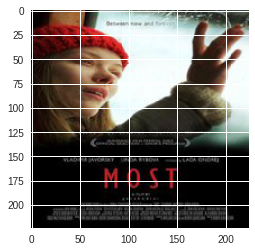

In [185]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

## Load images and reshape

In [0]:
images_training = []
for i in range(0,500):
    images_training.append(io.imread(os.path.join('Images_resize', str(i) + '.jpeg')))

In [187]:
dataTraining.shape

(7895, 5)

In [0]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image

for i in range(0,500):
    images_training[i] = resize(images_training[i], (224,224,3), mode='reflect')

In [189]:
images_training[97].shape

(224, 224, 3)

In [190]:
images_training = np.stack(images_training)
images_training.shape

(500, 224, 224, 3)

In [249]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join('Images_resize', str(i) + '.jpeg')))

100%|██████████| 3383/3383 [00:03<00:00, 846.68it/s]


In [250]:
images_testing[3382].shape

(200, 200, 3)

In [0]:
for i in range(0,3383):
    images_testing[i] = resize(images_testing[i], (224,224,3), mode='reflect')

In [252]:
images_testing = np.stack(images_testing)
images_testing.shape

(3383, 224, 224, 3)

## Train and test split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_training, y_genres, test_size=0.3, random_state=42)

In [192]:
X_train.shape

(350, 224, 224, 3)

## Modeling transfer learning from VGG16

In [0]:
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)

In [0]:
predict=model_vgg16.predict(X_train)

In [195]:
predict.shape

(350, 7, 7, 512)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Flatten(input_shape=(7,7,512)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))
model.compile("rmsprop", "categorical_crossentropy", metrics=["accuracy"])

In [256]:
model.fit(predict,y_train,epochs=50,verbose=2)

Epoch 1/50
 - 1s - loss: 33.8186 - acc: 0.2343
Epoch 2/50
 - 0s - loss: 36.4342 - acc: 0.2486
Epoch 3/50
 - 0s - loss: 36.4603 - acc: 0.1886
Epoch 4/50
 - 0s - loss: 36.2030 - acc: 0.2400
Epoch 5/50
 - 0s - loss: 35.8871 - acc: 0.2314
Epoch 6/50
 - 0s - loss: 33.2136 - acc: 0.1886
Epoch 7/50
 - 0s - loss: 31.8076 - acc: 0.2200
Epoch 8/50
 - 0s - loss: 29.4164 - acc: 0.2257
Epoch 9/50
 - 0s - loss: 26.4614 - acc: 0.2057
Epoch 10/50
 - 0s - loss: 9.6968 - acc: 0.2029
Epoch 11/50
 - 0s - loss: 7.5508 - acc: 0.2200
Epoch 12/50
 - 0s - loss: 7.4839 - acc: 0.2314
Epoch 13/50
 - 0s - loss: 7.1169 - acc: 0.3086
Epoch 14/50
 - 0s - loss: 6.9634 - acc: 0.2971
Epoch 15/50
 - 0s - loss: 6.4069 - acc: 0.3571
Epoch 16/50
 - 0s - loss: 6.2651 - acc: 0.3343
Epoch 17/50
 - 0s - loss: 6.3014 - acc: 0.3343
Epoch 18/50
 - 0s - loss: 5.8303 - acc: 0.3657
Epoch 19/50
 - 0s - loss: 5.7188 - acc: 0.4400
Epoch 20/50
 - 0s - loss: 5.7909 - acc: 0.4029
Epoch 21/50
 - 0s - loss: 5.5267 - acc: 0.3800
Epoch 22/50
 

In [0]:
x_test_new = model_vgg16.predict(X_test)

In [199]:
x_test_new.shape

(150, 7, 7, 512)

In [200]:
# make predictions for testing set
y_pred_genres = model.predict_proba(x_test_new)
y_pred_genres

array([[6.4191997e-02, 2.8521607e-02, 4.1350462e-03, ..., 7.0396751e-02,
        2.7686406e-02, 6.0735876e-03],
       [2.7305894e-03, 3.3776145e-03, 3.8876696e-04, ..., 6.8760160e-03,
        2.4481399e-03, 6.7954868e-05],
       [1.5109380e-02, 9.5208567e-03, 7.9342403e-04, ..., 2.7761856e-01,
        2.2537911e-02, 8.1306687e-05],
       ...,
       [9.6834805e-03, 6.8323021e-03, 2.0174263e-03, ..., 3.6700930e-02,
        2.5306499e-02, 5.9845490e-05],
       [7.6764345e-02, 3.6884896e-02, 1.0733736e-02, ..., 9.9004053e-02,
        3.7066543e-03, 9.7156679e-03],
       [6.1342001e-02, 4.4287022e-02, 3.1627628e-03, ..., 1.5804376e-01,
        2.3600012e-02, 1.9231356e-03]], dtype=float32)

In [201]:
y_test.shape

(150, 24)

In [202]:
y_pred_genres

array([[6.4191997e-02, 2.8521607e-02, 4.1350462e-03, ..., 7.0396751e-02,
        2.7686406e-02, 6.0735876e-03],
       [2.7305894e-03, 3.3776145e-03, 3.8876696e-04, ..., 6.8760160e-03,
        2.4481399e-03, 6.7954868e-05],
       [1.5109380e-02, 9.5208567e-03, 7.9342403e-04, ..., 2.7761856e-01,
        2.2537911e-02, 8.1306687e-05],
       ...,
       [9.6834805e-03, 6.8323021e-03, 2.0174263e-03, ..., 3.6700930e-02,
        2.5306499e-02, 5.9845490e-05],
       [7.6764345e-02, 3.6884896e-02, 1.0733736e-02, ..., 9.9004053e-02,
        3.7066543e-03, 9.7156679e-03],
       [6.1342001e-02, 4.4287022e-02, 3.1627628e-03, ..., 1.5804376e-01,
        2.3600012e-02, 1.9231356e-03]], dtype=float32)

In [0]:
y_pred_genres[y_pred_genres>=0.5]=1
y_pred_genres[y_pred_genres<0.5]=0

In [204]:
y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [205]:
print('The accuracy of the model is ',(y_pred_genres==y_test).mean())

The accuracy of the model is  0.8922222222222222


## Load and reshape testing images

In [206]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join('Images_resize', str(i) + '.jpeg')))

100%|██████████| 3383/3383 [00:04<00:00, 710.58it/s]


In [207]:
dataTesting.shape

(3383, 3)

In [0]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image

for i in range(0,3383):
    images_testing[i] = resize(images_testing[i], (224,224,3), mode='reflect')

In [209]:
images_testing = np.stack(images_testing)
images_testing.shape

(3383, 224, 224, 3)

In [0]:
x_test_new2 = model_vgg16.predict(images_testing)

In [211]:
x_test_new2.shape

(3383, 7, 7, 512)

In [212]:
# make predictions for testing set
y_pred_genres2 = model.predict_proba(x_test_new2)
y_pred_genres2

array([[3.52337658e-02, 3.49236280e-03, 7.15641363e-05, ...,
        3.09397206e-02, 1.01974809e-04, 3.89560882e-05],
       [3.68464530e-01, 3.20834666e-02, 3.68285691e-04, ...,
        1.93492994e-01, 1.91410608e-03, 5.07522433e-04],
       [4.35623666e-03, 2.90582702e-03, 1.38014904e-04, ...,
        1.10887957e-03, 1.34348942e-04, 1.43607467e-01],
       ...,
       [1.32639790e-02, 3.07870726e-03, 5.09650330e-04, ...,
        7.07519576e-02, 5.20233437e-03, 1.14134227e-05],
       [4.12763394e-02, 1.17123555e-02, 2.63189012e-03, ...,
        7.67139867e-02, 8.72797798e-03, 1.32377536e-04],
       [1.01938866e-01, 2.69492157e-02, 1.96185848e-03, ...,
        1.39347851e-01, 1.44166732e-02, 3.69800575e-04]], dtype=float32)

In [0]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

df = pd.DataFrame(y_pred_genres2, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_TL.csv', index_label='ID')

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [215]:
uploaded = drive.CreateFile({'title': 'pred_genres_img_TL.csv'})
uploaded.SetContentFile('pred_genres_img_TL.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1SDA9YTogke0Rb32A6PeBaHFAEUd28GXR


## Using text

In [0]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [217]:
vect = CountVectorizer(ngram_range=(1, 2), max_features=2000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 2000)

In [0]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres1, test_size=0.3, random_state=42)

In [219]:
X_train.shape

(5526, 2000)

## CNN for text

In [0]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Conv1D, GlobalMaxPooling1D
from keras.optimizers import RMSprop
from keras.callbacks import History

In [0]:
model1 = Sequential()
model1.add(Dense(256, input_shape=(2000,)))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(24))
model1.add(Activation('sigmoid'))

In [0]:
model1.compile("rmsprop", "categorical_crossentropy", metrics=["accuracy"])

In [232]:
model1.fit(X_train,y_train_genres,epochs=20,verbose=2)

Epoch 1/20
 - 2s - loss: 8.3412 - acc: 0.1258
Epoch 2/20
 - 1s - loss: 6.7808 - acc: 0.2727
Epoch 3/20
 - 1s - loss: 5.9957 - acc: 0.2959
Epoch 4/20
 - 1s - loss: 5.5850 - acc: 0.3283
Epoch 5/20
 - 1s - loss: 5.3391 - acc: 0.3587
Epoch 6/20
 - 1s - loss: 5.1350 - acc: 0.3650
Epoch 7/20
 - 1s - loss: 4.9765 - acc: 0.3793
Epoch 8/20
 - 1s - loss: 4.8598 - acc: 0.3874
Epoch 9/20
 - 1s - loss: 4.7348 - acc: 0.3987
Epoch 10/20
 - 1s - loss: 4.6512 - acc: 0.4021
Epoch 11/20
 - 1s - loss: 4.6150 - acc: 0.4126
Epoch 12/20
 - 1s - loss: 4.5227 - acc: 0.4332
Epoch 13/20
 - 1s - loss: 4.4540 - acc: 0.4216
Epoch 14/20
 - 1s - loss: 4.4261 - acc: 0.4215
Epoch 15/20
 - 1s - loss: 4.4068 - acc: 0.4229
Epoch 16/20
 - 1s - loss: 4.3622 - acc: 0.4137
Epoch 17/20
 - 1s - loss: 4.3236 - acc: 0.4216
Epoch 18/20
 - 1s - loss: 4.2903 - acc: 0.4245
Epoch 19/20
 - 1s - loss: 4.3025 - acc: 0.4323
Epoch 20/20
 - 1s - loss: 4.2773 - acc: 0.4318


In [233]:
# make predictions for testing set
y_pred = model1.predict(X_train)
y_pred

array([[7.74711680e-07, 7.61685846e-03, 8.98996592e-01, ...,
        1.21240346e-05, 3.28704323e-06, 2.80150039e-06],
       [3.98119170e-07, 3.10417079e-07, 4.97935559e-08, ...,
        2.30671272e-01, 1.58903486e-08, 6.38719584e-08],
       [5.54024700e-06, 2.38099092e-04, 1.02114573e-05, ...,
        1.00668776e-03, 6.32790352e-06, 4.61932905e-06],
       ...,
       [1.24770485e-01, 1.28877407e-04, 5.13594365e-04, ...,
        6.58430755e-01, 1.64224487e-03, 2.74283870e-04],
       [9.00316809e-05, 9.72962425e-07, 9.26357491e-10, ...,
        9.75073516e-01, 1.16426930e-08, 2.43730689e-08],
       [7.38233551e-02, 1.47645235e-01, 3.60225648e-01, ...,
        1.03869133e-01, 9.95958149e-02, 5.08590415e-03]], dtype=float32)

In [234]:
roc_auc_score(y_train_genres, y_pred)

0.9932870972318603

In [235]:
vect = CountVectorizer(ngram_range=(1, 2), max_features=2000)
X_dtm2 = vect.fit_transform(dataTesting['plot'])
X_dtm2.shape

(3383, 2000)

In [236]:
y_pred_testing = model1.predict(X_dtm2)
y_pred_testing

array([[1.7849207e-27, 6.2009306e-30, 0.0000000e+00, ..., 7.5832986e-21,
        1.4948316e-34, 6.0210266e-37],
       [8.0548539e-08, 4.6722755e-09, 2.6590015e-12, ..., 5.3789893e-07,
        2.1124270e-14, 2.6097974e-11],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.8709672e-22, 1.6023134e-27, 5.5965093e-34, ..., 1.6931001e-16,
        4.5447890e-29, 1.0059787e-33],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.0085492e-33,
        0.0000000e+00, 0.0000000e+00],
       [4.0004513e-20, 5.5837814e-18, 1.1584690e-21, ..., 2.4545527e-13,
        5.0418827e-21, 2.2042073e-21]], dtype=float32)

In [0]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

df = pd.DataFrame(y_pred_testing, index=dataTesting.index, columns=cols).to_csv('pred_genres_FINAL.csv', index_label='ID')

In [229]:
uploaded = drive.CreateFile({'title': 'pred_genres_FINAL.csv'})
uploaded.SetContentFile('pred_genres_FINAL.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 13ttoCbJLKlLTJtD0M-JE4UQRJgcv2cJJ


## Now, we're going to join both results by averaging the predicted probabilities

In [0]:
predict_test=model_vgg16.predict(images_testing)

In [0]:
y_pred_testing_imag = model.predict(predict_test)

In [0]:
Ynew = (np.array(y_pred_testing)+np.array(y_pred_testing_imag))/2

In [260]:
Ynew.shape

(3383, 24)